<a href="https://colab.research.google.com/github/gkianfar/DemCare-Analysis/blob/main/DemCare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essential packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# DS 11

In [4]:
# Set directory path
dir_path = '/content/drive/MyDrive/DemCare/D11'

# List the files in the directory
files = [f for f in os.listdir(dir_path)]

# Print the subfolders
print(files)

['Motion.csv', 'Plugs.csv', 'MovingIntensity.csv', 'NightSleep.csv', 'SleepMeasurements.csv']


Motion file

In [7]:
file_name = 'Motion.csv'
file_path = os.path.join(dir_path, file_name)
df_motion = pd.read_csv(file_path,sep=';', quotechar='"')
df_motion

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-21 13:39:46.477,10136,2015-02-21 13:39:31.399,FridgeDoorMoved,2015-02-21,15,0,1,TagSensors
1,2015-02-21 14:17:39.583,10136,2015-02-21 14:17:18.906,FridgeDoorMoved,2015-02-21,20,0,1,TagSensors
2,2015-02-21 14:19:54.291,10136,2015-02-21 14:19:53.215,FridgeDoorMoved,2015-02-21,1,0,1,TagSensors
3,2015-02-21 14:20:24.058,10136,2015-02-21 14:20:07.942,FridgeDoorMoved,2015-02-21,16,0,1,TagSensors
4,2015-02-21 14:22:04.625,10136,2015-02-21 14:21:51.464,FridgeDoorMoved,2015-02-21,13,0,1,TagSensors
...,...,...,...,...,...,...,...,...,...
29924,2015-07-10 19:24:24.239,10136,2015-07-10 19:24:23.239,DoorOpen,2015-07-10,1,0,1,TagSensors
29925,2015-07-10 19:25:09.763,10136,2015-07-10 19:24:36.756,BathroomPresence,2015-07-10,33,0,1,TagSensors
29926,2015-07-10 19:26:18.180,10136,2015-07-10 19:25:30.119,BathroomPresence,2015-07-10,48,0,1,TagSensors
29927,2015-07-10 19:26:04.083,10136,2015-07-10 19:26:03.083,PillBoxMoved,2015-07-10,1,0,1,TagSensors


Number of people and types of devices

In [8]:
# Number of people
n_people = df_motion['person_id'].nunique()
n_type = df_motion['type'].nunique()
print(f'Number of people: {n_people}')
print(f'Number of types of devices: {n_type}')
#

Number of people: 1
Number of types of devices: 11


In [11]:
df_motion['type'].unique()

array(['FridgeDoorMoved', 'KitchenPresence', 'TvRemoteMoved',
       'DrugCabinetMoved', 'PillBoxMoved', 'IronMoved',
       'BathroomPresence', 'HerbsMoved', 'VacuumMoved', 'DoorOpen',
       'TvRemoteLivingRoomMoved'], dtype=object)

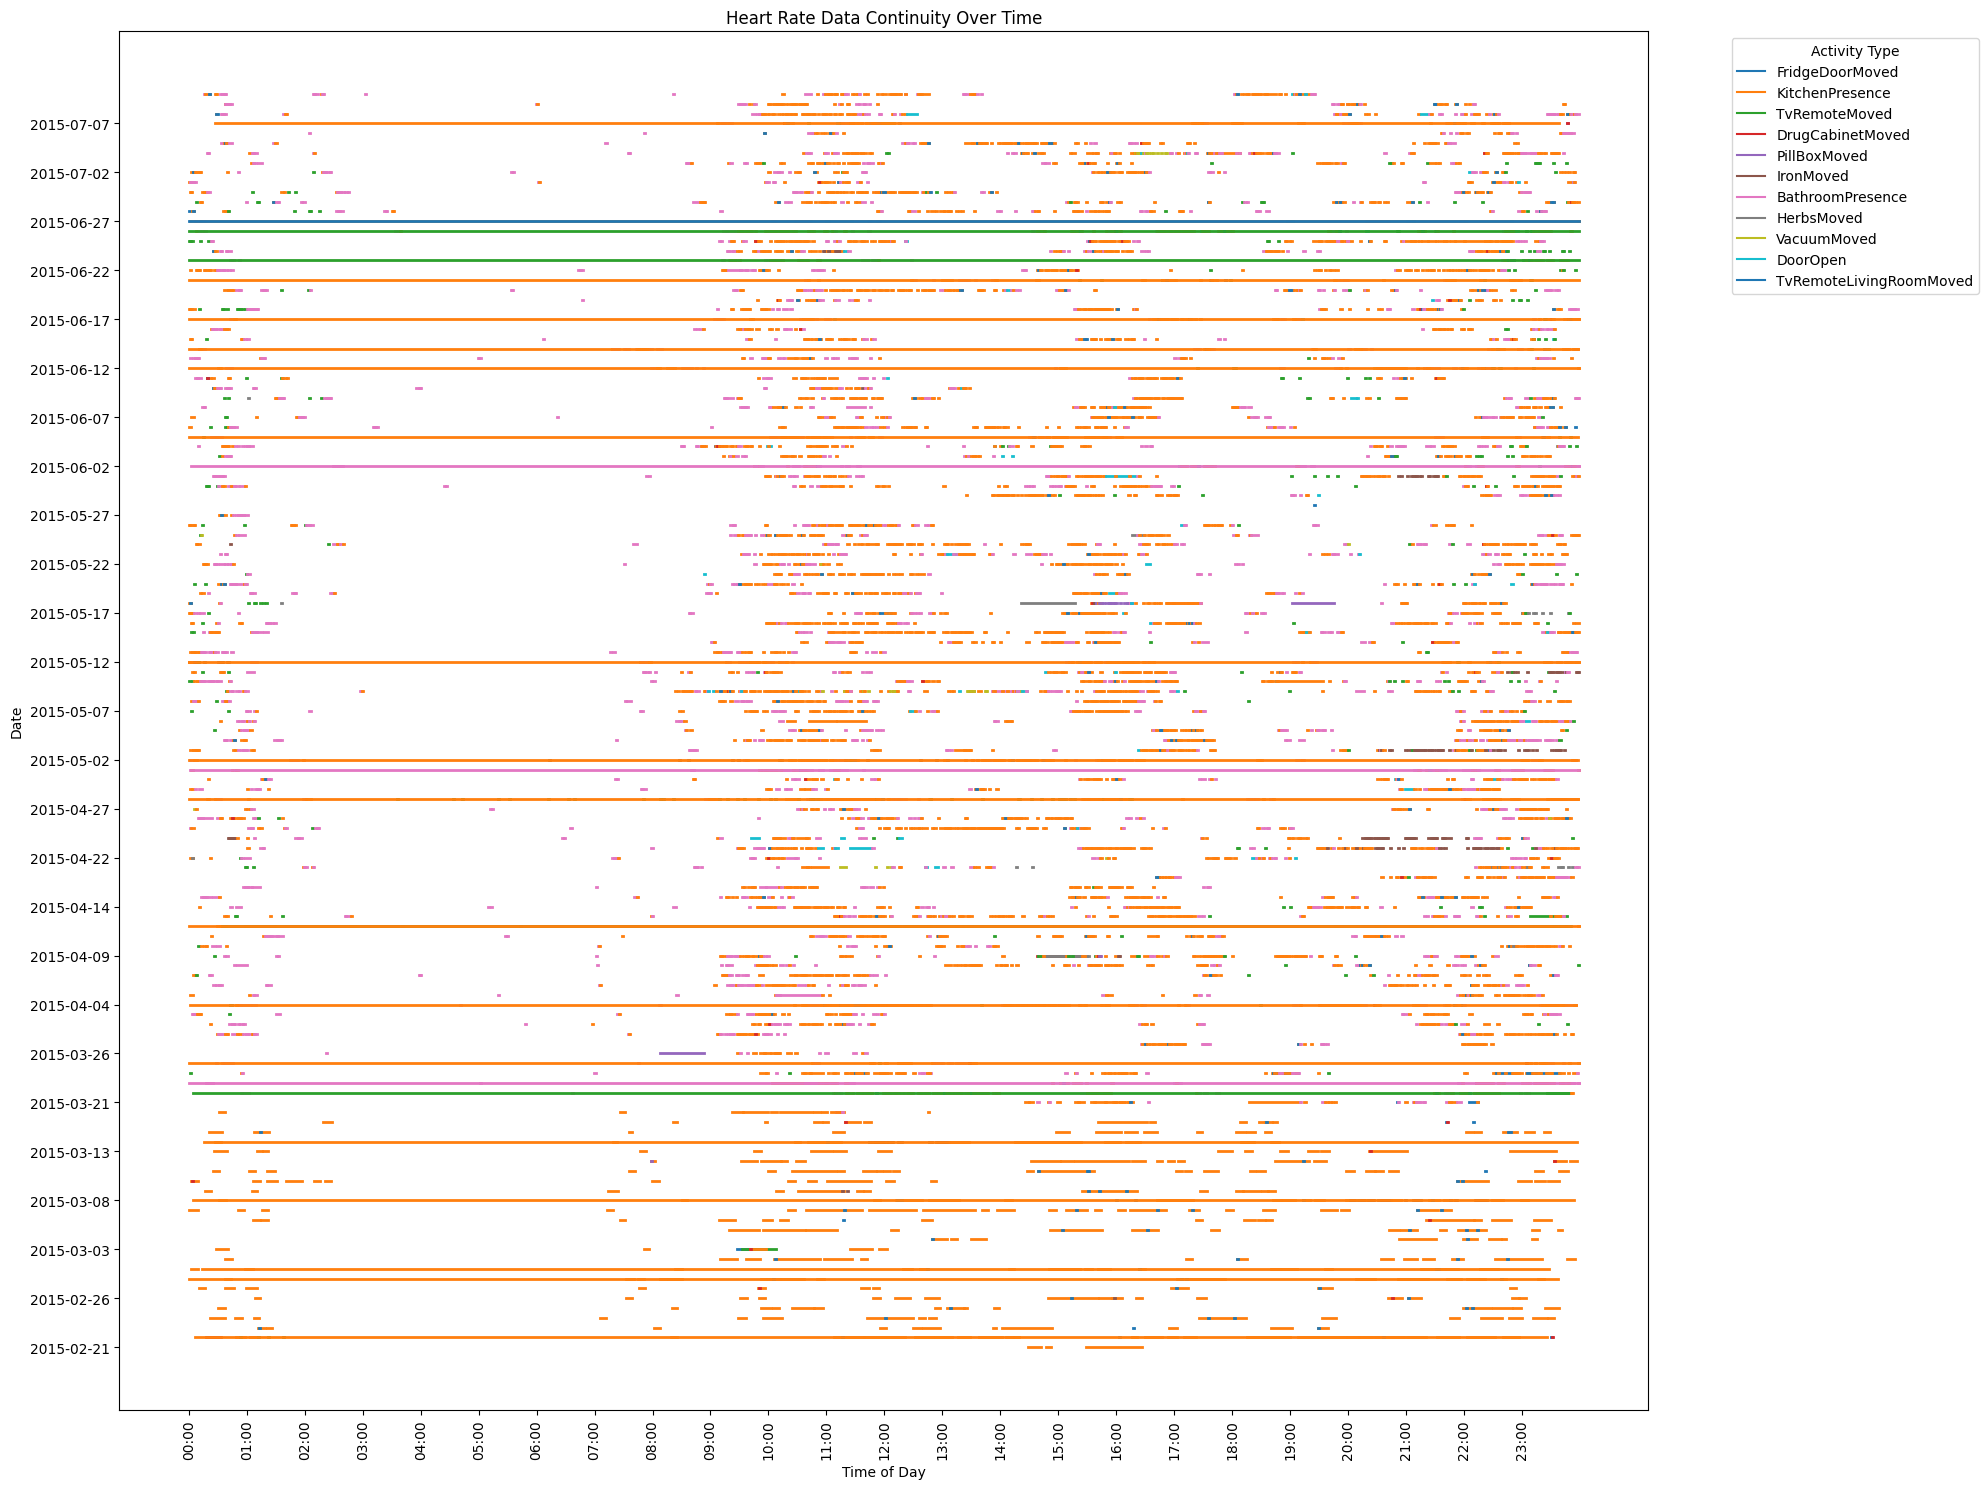

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format and extract date/time
df_motion['date'] = pd.to_datetime(df_motion['date'])
df_motion['start_time'] = pd.to_datetime(df_motion['start_time'])
df_motion['end_time'] = pd.to_datetime(df_motion['end_time'])

# Create time axis: every minute of the day
time_strings = [f"{h:02}:{m:02}" for h in range(24) for m in range(60)]

# Define time to index mapping
def time_to_index(t):
    return t.hour * 60 + t.minute

# Unique dates
all_dates = sorted(df_motion['date'].dt.date.unique())
freq = 5
date_labels = pd.date_range(start=min(all_dates), end=max(all_dates), freq=f"{freq}D").strftime('%Y-%m-%d')

# Detect missing days
date_counts = df_motion['date'].dt.date.value_counts()
missing_days = [d for d in all_dates if d not in date_counts.index]

# Define color palette per type (customize as needed)
unique_types = df_motion['type'].unique()
color = {t: plt.cm.tab10(i % 10) for i, t in enumerate(unique_types)}

# Plotting
fig, ax = plt.subplots(figsize=(20, 15))

for day_idx, date in enumerate(all_dates):
    y_val = day_idx + 1
    if date in missing_days:
        plt.plot(range(len(time_strings)), [y_val] * len(time_strings), color='lightgray', linestyle='--')
    else:
        day_data = df_motion[df_motion['date'].dt.date == date]
        for _, row in day_data.iterrows():
            x_start = time_to_index(row['start_time'])
            x_end = time_to_index(row['end_time'])
            plt.plot([x_start, x_end], [y_val, y_val], color=color[row['type']], linewidth=2)

# Format axes
hour_ticks = [f"{h:02}:00" for h in range(24)]
plt.xticks(range(0, 1440, 60), hour_ticks, rotation=90)
# Y-axis positions for ticks
ytick_positions = list(range(1, len(all_dates) + 1, freq))
ytick_labels = [str(all_dates[i]) for i in range(0, len(all_dates), freq)]

plt.yticks(ytick_positions, ytick_labels)


plt.xlabel('Time of Day')
plt.ylabel('Date')
plt.title('Heart Rate Data Continuity Over Time')

# Optional: Add legend
handles = [plt.Line2D([0], [0], color=color[t], label=t) for t in color]
plt.legend(handles=handles, title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [16]:
# Plausability and is_high_level
is_high_level = df_motion['is_high_level'].unique()
plausability = df_motion['plausability'].unique()
print(f"is_high: {is_high_level}")
print(f"plausability:{plausability}")

is_high: [0]
plausability:[1]


Plugs

In [74]:
file_name = 'Plugs.csv'
file_path = os.path.join(dir_path, file_name)
df_plugs = pd.read_csv(file_path,sep=';',quotechar='"')
df_plugs

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-22 00:22:36.228,10136,2015-02-22 00:19:30.711,BoilerOn,2015-02-22,185,0,1,SmartPlug
1,2015-02-22 00:24:06.377,10136,2015-02-22 00:23:32.685,BoilerOn,2015-02-22,33,0,1,SmartPlug
2,2015-03-04 21:12:52.151,10136,2015-03-04 21:05:06.447,CookerOn,2015-03-04,465,0,1,SmartPlug
3,2015-03-04 21:23:40.550,10136,2015-03-04 21:19:17.268,CookerOn,2015-03-04,263,0,1,SmartPlug
4,2015-03-04 21:25:12.996,10136,2015-03-04 21:23:52.928,CookerOn,2015-03-04,80,0,1,SmartPlug
...,...,...,...,...,...,...,...,...,...
2525,2015-07-10 13:17:57.404,10136,2015-07-10 12:55:19.889,WashingMachineOn,2015-07-10,1357,0,1,SmartPlug
2526,2015-07-10 18:17:27.245,10136,2015-07-10 18:11:56.152,CookerOn,2015-07-10,331,0,1,SmartPlug
2527,2015-07-10 18:49:56.856,10136,2015-07-10 18:47:33.380,WashingMachineOn,2015-07-10,143,0,1,SmartPlug
2528,2015-07-10 19:01:41.305,10136,2015-07-10 18:59:06.677,WashingMachineOn,2015-07-10,154,0,1,SmartPlug


In [75]:
# Types of appliances
df_plugs['type'].unique()

array(['BoilerOn', 'CookerOn', 'TvOn', 'WashingMachineOn', 'IronOn',
       'VacuumOn'], dtype=object)

Moving Intensity

In [44]:
file_name = 'MovingIntensity.csv'
file_path = os.path.join(dir_path, file_name)
df_movingintensity = pd.read_csv(file_path,sep=';',quotechar='"')
df_movingintensity

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider,value
0,2015-02-05 13:11:00.000,10136,2015-02-05 13:10:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,34
1,2015-02-05 13:51:00.000,10136,2015-02-05 13:50:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,25
2,2015-02-05 13:52:00.000,10136,2015-02-05 13:51:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,14
3,2015-02-05 13:53:00.000,10136,2015-02-05 13:52:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,73
4,2015-02-05 13:54:00.000,10136,2015-02-05 13:53:00.000,MovingIntensity,2015-02-05,60,0,1,UP24,7
...,...,...,...,...,...,...,...,...,...,...
5976,2015-07-05 16:10:00.000,10136,2015-07-05 16:09:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,106
5977,2015-07-05 16:11:00.000,10136,2015-07-05 16:10:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,107
5978,2015-07-05 16:12:00.000,10136,2015-07-05 16:11:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,79
5979,2015-07-05 16:13:00.000,10136,2015-07-05 16:12:00.000,MovingIntensity,2015-07-05,60,0,1,UP24,38


In [69]:
df_movingintensity['start_time'] = pd.to_datetime(df_movingintensity['start_time'])
df_movingintensity['date'] = pd.to_datetime(df_movingintensity['date'])

# Sort before groupby to ensure proper time order
df_movingintensity = df_movingintensity.sort_values(['date', 'start_time'])

df_movingintensity['time_diff_sec'] = (df_movingintensity['end_time']-df_movingintensity['start_time']).dt.total_seconds()

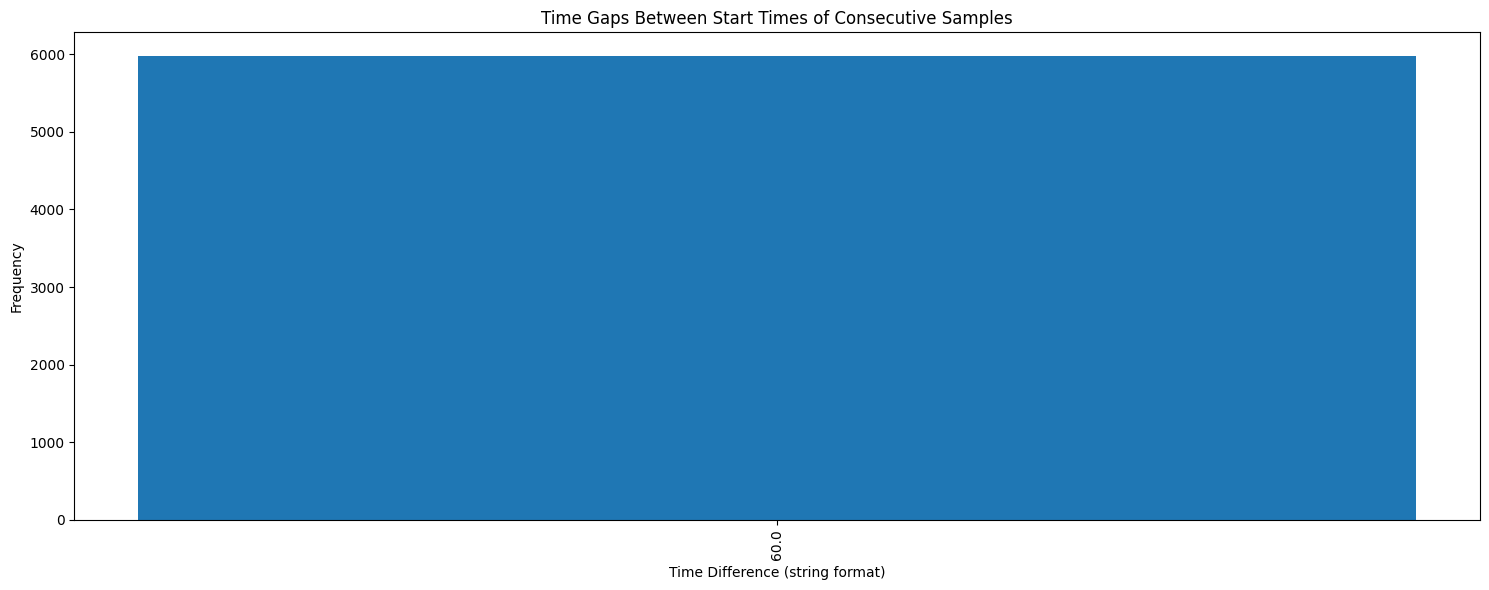

In [71]:
# Get unique values and counts
values, counts = np.unique(df_movingintensity['time_diff_sec'], return_counts=True)

# Plot with equal spacing
plt.figure(figsize=(15, 6))
x_pos = np.arange(len(values))  # equally spaced positions
plt.bar(x_pos, counts, tick_label=values)

# Style
plt.xticks(rotation=90)
plt.xlabel('Time Difference (string format)')
plt.ylabel('Frequency')
plt.title('Time Gaps Between Start Times of Consecutive Samples')
plt.tight_layout()
plt.show()

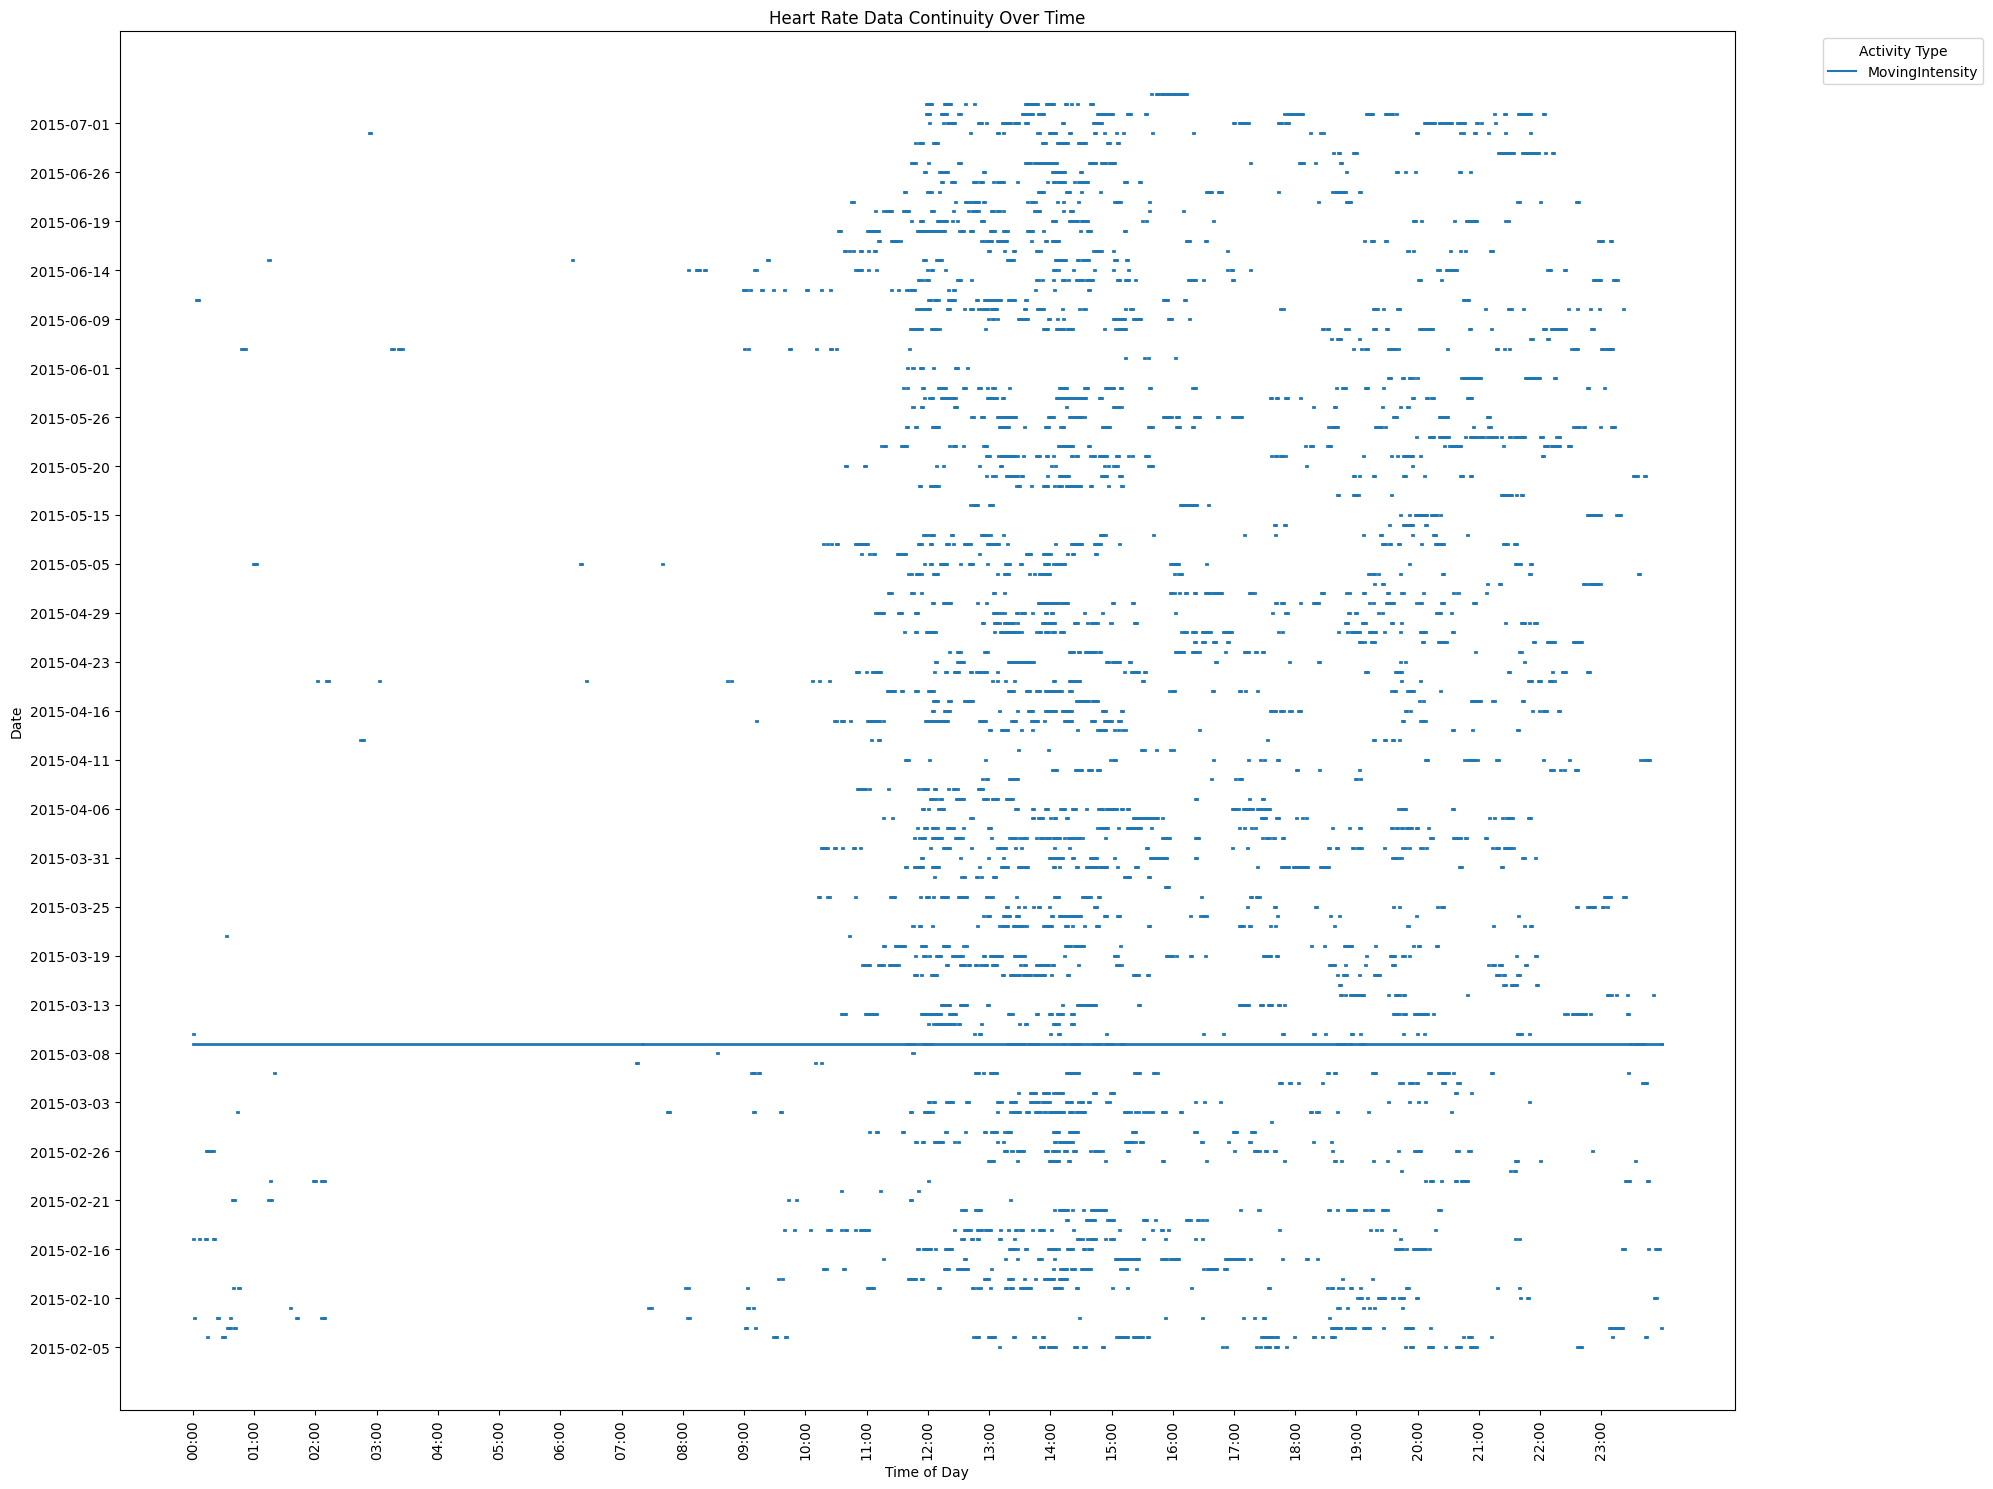

In [66]:
# Ensure datetime format and extract date/time
df_movingintensity['date'] = pd.to_datetime(df_movingintensity['date'])
df_movingintensity['start_time'] = pd.to_datetime(df_movingintensity['start_time'])
df_movingintensity['end_time'] = pd.to_datetime(df_movingintensity['end_time'])

# Create time axis: every minute of the day
time_strings = [f"{h:02}:{m:02}:{s:02}" for h in range(24) for m in range(60) for s in range(60)]

# Define time to index mapping
def time_to_index(t):
    return t.hour * 60 + t.minute

# Unique dates
all_dates = sorted(df_movingintensity['date'].dt.date.unique())
freq = 5
date_labels = pd.date_range(start=min(all_dates), end=max(all_dates), freq=f"{freq}D").strftime('%Y-%m-%d')

# Detect missing days
date_counts = df_movingintensity['date'].dt.date.value_counts()
missing_days = [d for d in all_dates if d not in date_counts.index]

# Define color palette per type (customize as needed)
unique_types = df_movingintensity['type'].unique()
color = {t: plt.cm.tab10(i % 10) for i, t in enumerate(unique_types)}

# Plotting
fig, ax = plt.subplots(figsize=(20, 15))

for day_idx, date in enumerate(all_dates):
    y_val = day_idx + 1
    if date in missing_days:
        plt.plot(range(len(time_strings)), [y_val] * len(time_strings), color='yellow', linestyle='--')
    else:
        day_data = df_movingintensity[df_movingintensity['date'].dt.date == date]
        for _, row in day_data.iterrows():
            x_start = time_to_index(row['start_time'])
            x_end = time_to_index(row['end_time'])
            plt.plot([x_start, x_end], [y_val, y_val], color=color[row['type']], linewidth=2)

# Format axes
hour_ticks = [f"{h:02}:00" for h in range(24)]
plt.xticks(range(0, 1440, 60), hour_ticks, rotation=90)

# Y-axis positions for ticks
ytick_positions = list(range(1, len(all_dates) + 1, freq))
ytick_labels = [str(all_dates[i]) for i in range(0, len(all_dates), freq)]
plt.yticks(ytick_positions, ytick_labels)

plt.xlabel('Time of Day')
plt.ylabel('Date')
plt.title('Heart Rate Data Continuity Over Time')

# Optional: Add legend
handles = [plt.Line2D([0], [0], color=color[t], label=t) for t in color]
plt.legend(handles=handles, title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [68]:
df_movingintensity[df_movingintensity['date']=='2015-03-10']

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider,value,time_diff_sec
1306,2015-03-10 00:01:00,10136,2015-03-10 00:00:00,MovingIntensity,2015-03-10,60,0,1,UP24,6,NaN
1307,2015-03-10 12:46:00,10136,2015-03-10 12:45:00,MovingIntensity,2015-03-10,60,0,1,UP24,31,45900.0
1308,2015-03-10 12:51:00,10136,2015-03-10 12:50:00,MovingIntensity,2015-03-10,60,0,1,UP24,65,300.0
1309,2015-03-10 12:52:00,10136,2015-03-10 12:51:00,MovingIntensity,2015-03-10,60,0,1,UP24,58,60.0
1310,2015-03-10 14:01:00,10136,2015-03-10 14:00:00,MovingIntensity,2015-03-10,60,0,1,UP24,36,4140.0
1311,2015-03-10 14:09:00,10136,2015-03-10 14:08:00,MovingIntensity,2015-03-10,60,0,1,UP24,12,480.0
1312,2015-03-10 14:10:00,10136,2015-03-10 14:09:00,MovingIntensity,2015-03-10,60,0,1,UP24,2,60.0
1313,2015-03-10 14:56:00,10136,2015-03-10 14:55:00,MovingIntensity,2015-03-10,60,0,1,UP24,16,2760.0
1314,2015-03-10 16:31:00,10136,2015-03-10 16:30:00,MovingIntensity,2015-03-10,60,0,1,UP24,22,5700.0
1315,2015-03-10 16:50:00,10136,2015-03-10 16:49:00,MovingIntensity,2015-03-10,60,0,1,UP24,23,1140.0


Night Sleep

In [76]:
# Set file name
file_name = 'NightSleep.csv'
file_path = os.path.join(dir_path, file_name)

# Read CSV file
df_nightsleep = pd.read_csv(file_path,sep=';',quotechar='"')
df_nightsleep

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-18 09:39:00.000,10136,2015-02-18 09:16:00.000,NightSleep,2015-02-18,1380,0,1,Aura
1,2015-03-05 08:06:00.000,10136,2015-03-05 00:33:00.000,NightSleep,2015-03-05,27180,0,1,Aura
2,2015-03-05 09:18:00.000,10136,2015-03-05 08:17:00.000,NightSleep,2015-03-05,3660,0,1,Aura
3,2015-03-06 09:06:00.000,10136,2015-03-06 01:19:00.000,NightSleep,2015-03-06,28020,0,1,Aura
4,2015-03-07 10:16:00.000,10136,2015-03-07 01:50:00.000,NightSleep,2015-03-07,30360,0,1,Aura
...,...,...,...,...,...,...,...,...,...
140,2015-07-06 09:52:00.000,10136,2015-07-06 02:08:00.000,NightSleep,2015-07-06,27840,0,1,Aura
141,2015-07-07 09:01:00.000,10136,2015-07-07 00:00:00.000,NightSleep,2015-07-07,32460,0,1,Aura
142,2015-07-08 09:41:00.000,10136,2015-07-08 00:44:00.000,NightSleep,2015-07-08,32220,0,1,Aura
143,2015-07-09 09:26:00.000,10136,2015-07-09 00:49:00.000,NightSleep,2015-07-09,31020,0,1,Aura


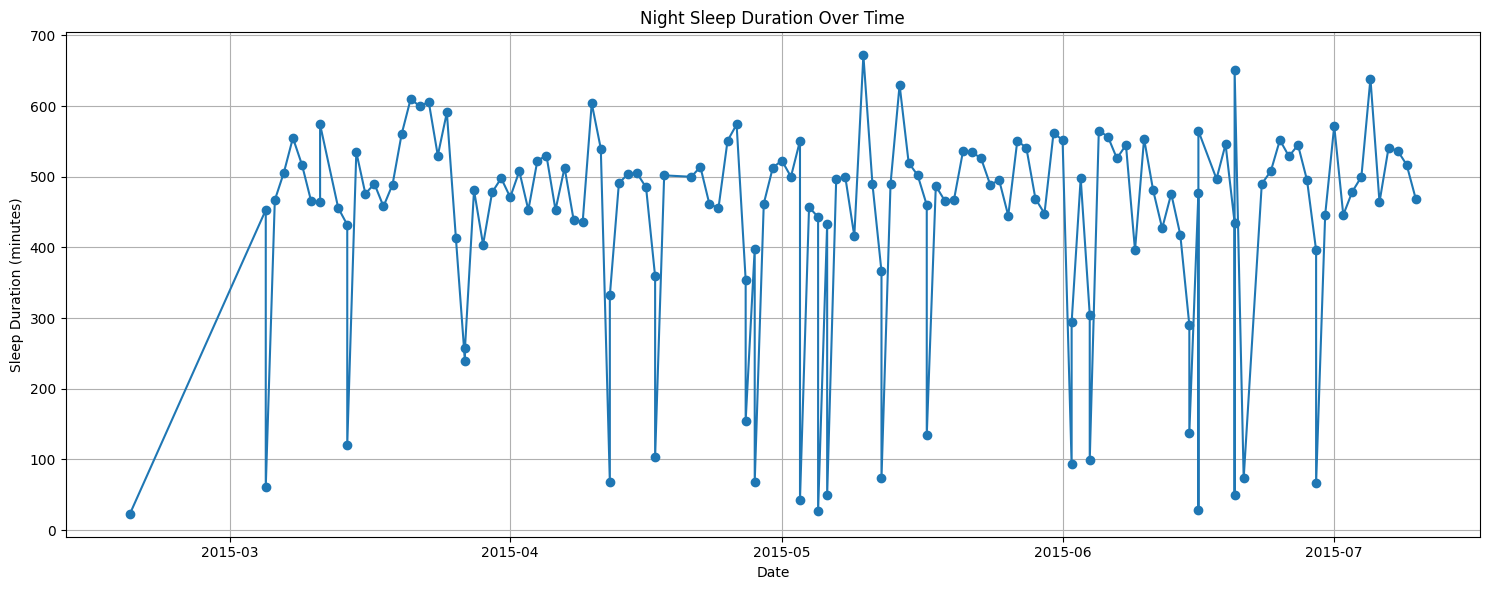

In [79]:
# Convert to datetime
df_nightsleep['date'] = pd.to_datetime(df_nightsleep['date'])
df_nightsleep['duration_min'] = df_nightsleep['duration'] / 60  # convert seconds to minutes

# Plot
plt.figure(figsize=(15, 6))
plt.plot(df_nightsleep['date'], df_nightsleep['duration_min'], marker='o', linestyle='-')
plt.title('Night Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


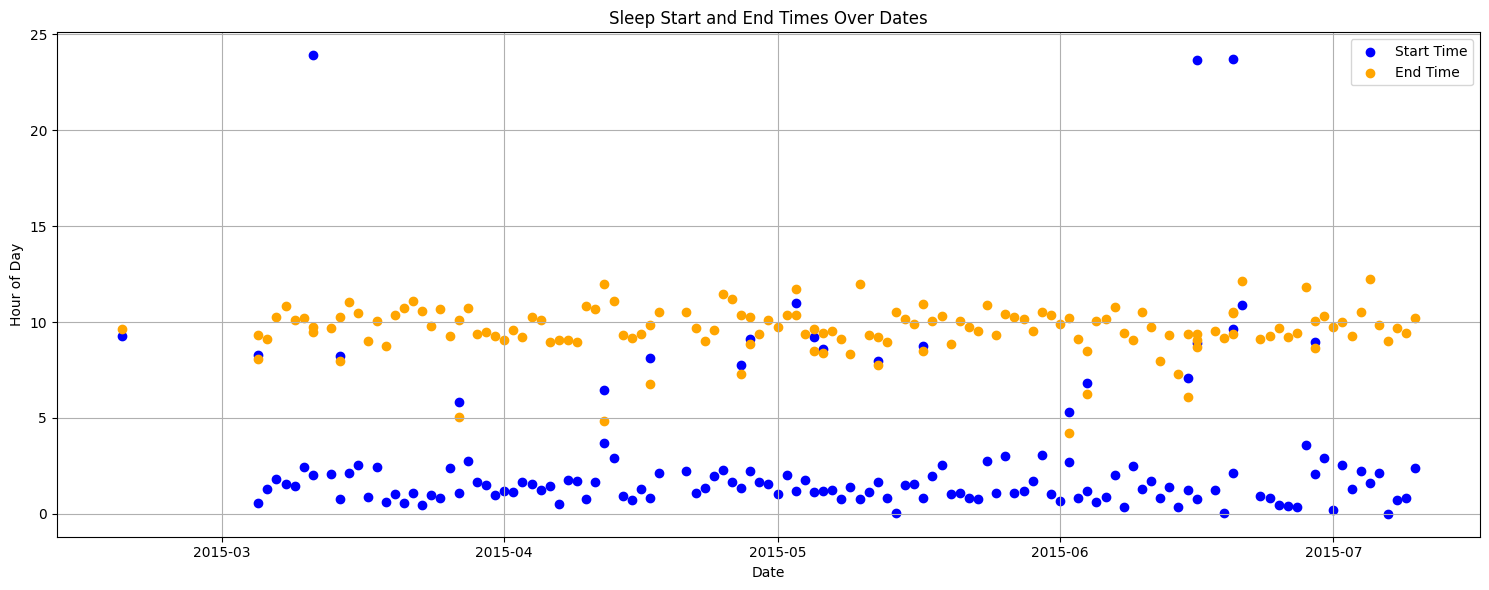

In [88]:
df_nightsleep['start_time_of_day'] = pd.to_datetime(df_nightsleep['start_time']).dt.time
df_nightsleep['end_time_of_day'] = pd.to_datetime(df_nightsleep['end_time']).dt.time

plt.figure(figsize=(15, 6))
plt.scatter(df_nightsleep['date'], pd.to_datetime(df_nightsleep['start_time']).dt.hour + pd.to_datetime(df_nightsleep['start_time']).dt.minute / 60,
            label='Start Time', color='blue')
plt.scatter(df_nightsleep['date'], pd.to_datetime(df_nightsleep['end_time']).dt.hour + pd.to_datetime(df_nightsleep['end_time']).dt.minute / 60,
            label='End Time', color='orange')

plt.title('Sleep Start and End Times Over Dates')
plt.ylabel('Hour of Day')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sleep Measurement

In [89]:
# Set file name
file_name = 'SleepMeasurements.csv'
file_path = os.path.join(dir_path, file_name)

# Read CSV file
df_sleepmeasurement = pd.read_csv(file_path,sep=';',quotechar='"')
df_sleepmeasurement

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider,value
0,2015-02-06 09:30:00.000,10136,2015-02-06 01:21:00.000,NumberOfInterruptions,2015-02-06,29340,0,1,Aura,2
1,2015-02-06 09:30:00.000,10136,2015-02-06 01:21:00.000,SleepLatency,2015-02-06,29340,0,1,Aura,60
2,2015-02-06 09:30:00.000,10136,2015-02-06 01:21:00.000,TotalTimeAsleep,2015-02-06,29340,0,1,Aura,29340
3,2015-02-06 09:30:00.000,10136,2015-02-06 01:21:00.000,TotalTimeDeepSleep,2015-02-06,29340,0,1,Aura,10440
4,2015-02-06 09:30:00.000,10136,2015-02-06 01:21:00.000,TotalTimeInBedButAwake,2015-02-06,29340,0,1,Aura,900
...,...,...,...,...,...,...,...,...,...,...
1057,2015-07-10 10:12:00.000,10136,2015-07-10 02:23:00.000,SleepLatency,2015-07-10,28140,0,1,Aura,420
1058,2015-07-10 10:12:00.000,10136,2015-07-10 02:23:00.000,TotalTimeAsleep,2015-07-10,28140,0,1,Aura,28140
1059,2015-07-10 10:12:00.000,10136,2015-07-10 02:23:00.000,TotalTimeDeepSleep,2015-07-10,28140,0,1,Aura,6960
1060,2015-07-10 10:12:00.000,10136,2015-07-10 02:23:00.000,TotalTimeInBedButAwake,2015-07-10,28140,0,1,Aura,3420


In [90]:
# Types of measurements
df_sleepmeasurement['type'].unique()

array(['NumberOfInterruptions', 'SleepLatency', 'TotalTimeAsleep',
       'TotalTimeDeepSleep', 'TotalTimeInBedButAwake',
       'TotalTimeShallowSleep'], dtype=object)

In [96]:
df_sleep_metrics = df_sleepmeasurement.pivot_table(
    index='date',
    columns='type',
    values='value',
    aggfunc='mean'  # or 'sum', 'median', 'max', etc., depending on your goal
)


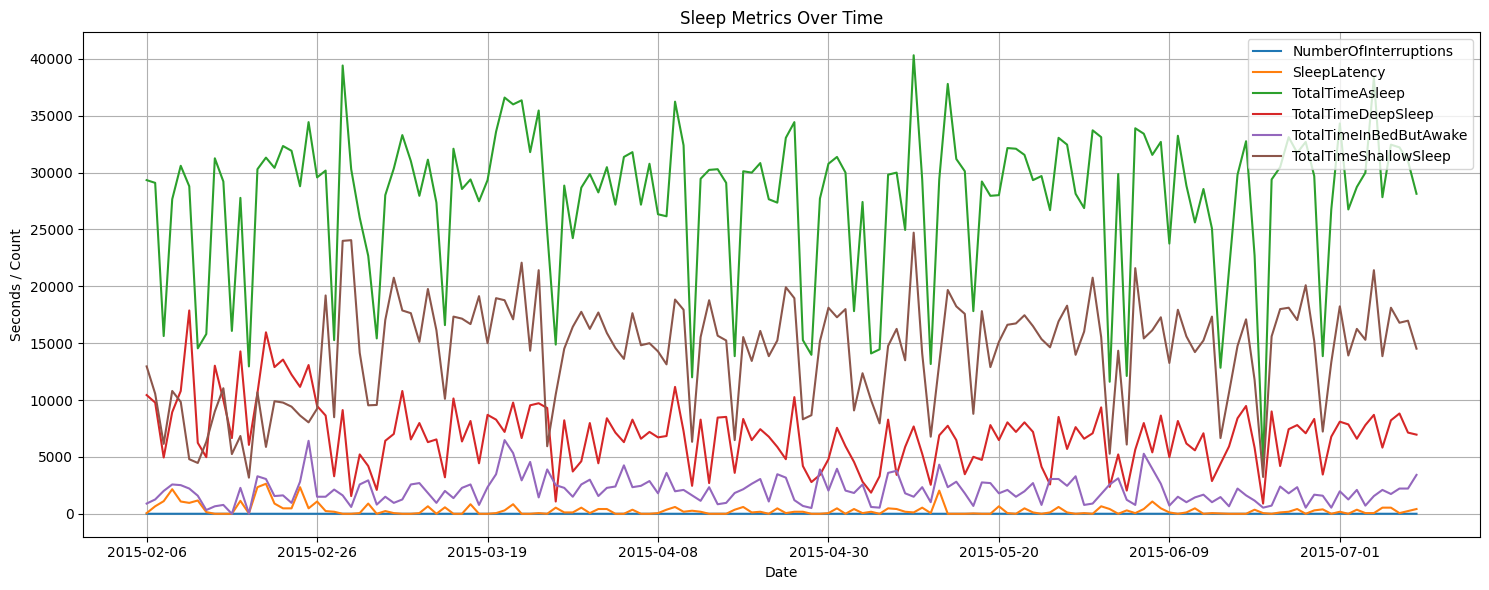

In [97]:
import matplotlib.pyplot as plt

df_sleep_metrics.plot(figsize=(15, 6))
plt.title("Sleep Metrics Over Time")
plt.ylabel("Seconds / Count")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


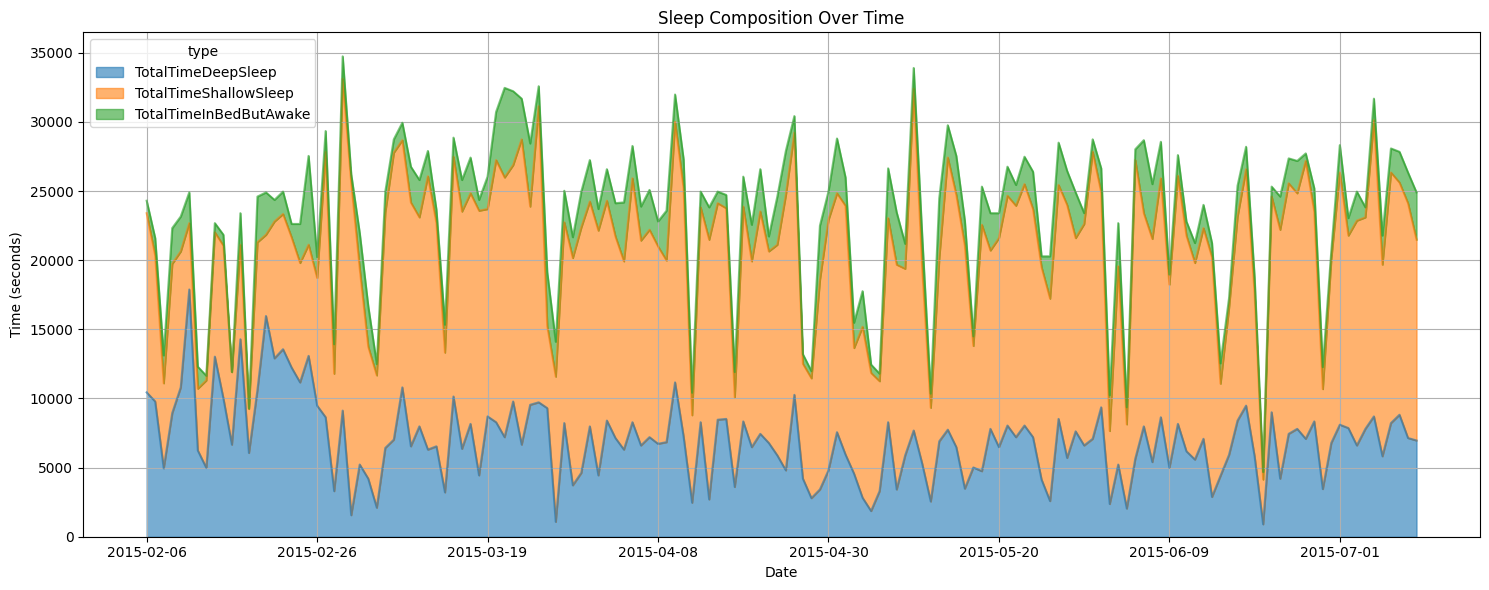

In [98]:
df_sleep_metrics[['TotalTimeDeepSleep', 'TotalTimeShallowSleep', 'TotalTimeInBedButAwake']].plot.area(
    stacked=True, figsize=(15, 6), alpha=0.6
)
plt.title("Sleep Composition Over Time")
plt.ylabel("Time (seconds)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()
